In [1]:
import sys
mod_path = "../python"
sys.path.append(mod_path)
from v2_kinematic_pred_distrib import error_plotter
import numpy as np
import matplotlib.pyplot as plt

In [3]:
expID = "9" # energy regression without mass vars
runID = "7127c31917124a41be197dca8f961eca" # 1 epoch
runID = "4e5ae9be01d64d56a2f91bf1b5025ffa" # 4 epochs

expID = "15" # Weekend tests
# runID = "28bac3addf4e407d9b9b69c9d9a7316b" # Divide loss
runID = "d2ef8e3331594ad999eaf02edb3eef10" # Divide loss + HPS vars # Best so far
# runID = "7c78206054a64b308b2d849bd7c01139" # Log loss
runID = "dd7431cc428a484eb9f11608ee7b6582" # Log loss + HPS vars
# runID = "4aaa4f2cebc548b1b773341ffb63b90e" # DM 1 only
# runID = "aca8834fcb9e44d89d63502f5f0e5ab5" # HPS DM 1 only

expID = "16" # weighted
runID = "ce29fcf61bd44d669142bd35b41aaa8e" # custom MSE/max
runID = "aa1d516addcc44b5828102a13ee8f12f" # MAE/max # best so far
# runID = "55cfecfc329c4ca09d53e1be421f6eb5" # MAPE
# runID = "3f2766ee409441868044a5b21461f769" # MAPE unweighted
# runID = "3b7ada0066524282997988890482a77a" # custom MSE/max2
runID = "8e697099cd674e2780b1f074cbda614f" # tf MSE/max2
# runID = "9e84b36db49146a0a02fb1445deff3ee" # tf MSE/max
runID = "d3f1cbd1d96047f1998e294aedbb0b81" # MAE HPS UNWEIGHTED
# runID = "35ceefed68584d699970e47dbdd60b5b" # MAE NO HPS WEIGHTED


expID = "17" # more HPS vars
runID = "9c5496649a4847f6bfbb8ce09985ecf2" # MAE/max weighted
runID = "ab1254cae15a473897c326d549537b16" # MAE/max unweighted
# runID = "795d7f91d408476689c797c3b3e5e90f" # MSE/max2 weighted
# runID = "fdd54ce7adfb476481dd198a243693ec" # MSE/max2 unweighted

expID = "19" # implement loss properly with divide thing
runID = "aa9ce2f309164545aa2b6548ef16a212" # AE/tau p unwe
runID = "65453e08f7ef48eda554d64be9b56703" # AE/tau p weighted
# runID = "8d57a306a488413dad1cea00a9218c87" # divide loss by mean p in batch
# # no HPS runs:
# runID = "130306e1ca794321aa0d081eb25b4d71" # MSE/max2 W
# runID = "ea52354bbc034cfbaa9c4720303e3ed8" # MAE/max W
# runID = "0d4a01a1778e4811866f74a662737147" # MAE/max U
# runID = "130306e1ca794321aa0d081eb25b4d71" # MSE/max2 U
# all below with HPS
runID = "393b218cf81e46d5828d899537844a8d" # MAE NO DIVISION (batch size 50)
runID = "804765cfac9e410ea6b3fbbbb29d36f9" # MAE batch 50 >200 veto
runID = "ed5c5a4487624a2cb8739dfabcfc4626" # MAE batch 250
runID = "614157b143634eb1ab4d818117a50d08" # MAE batch 250 >200 veto

plotter = error_plotter(expID, runID)

616.8743
-0.0841
5.7548


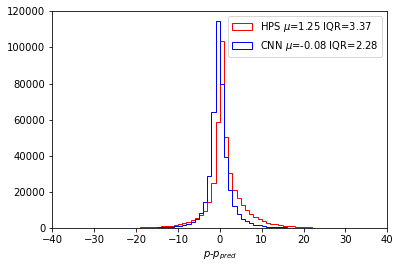

In [4]:
plotter.compare_momentum()

[  0.    2.5   5.    7.5  10.   12.5  15.   17.5  20.   22.5  25.   27.5
  30.   32.5  35.   37.5  40.   42.5  45.   47.5  50.   52.5  55.   57.5
  60.   65.   70.   75.   80.   90.  100.  120.  140.  160. ]
[  1.25   3.75   6.25   8.75  11.25  13.75  16.25  18.75  21.25  23.75
  26.25  28.75  31.25  33.75  36.25  38.75  41.25  43.75  46.25  48.75
  51.25  53.75  56.25  58.75  62.5   67.5   72.5   77.5   85.    95.
 110.   130.   150.  ]


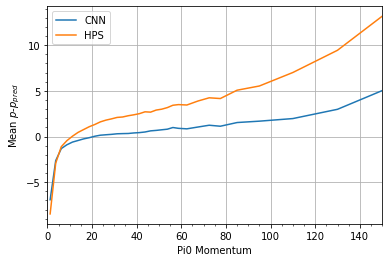

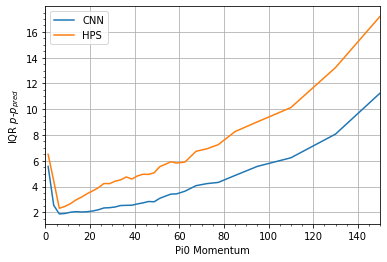

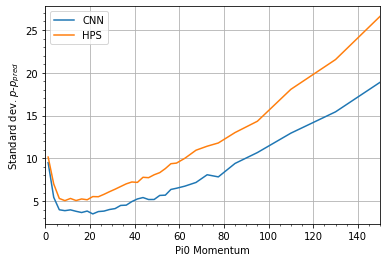

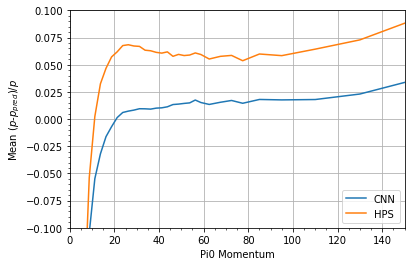

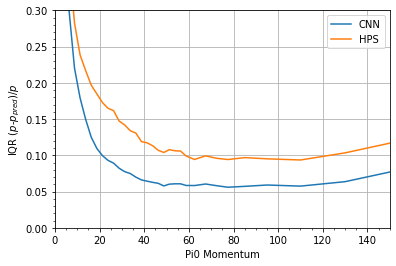

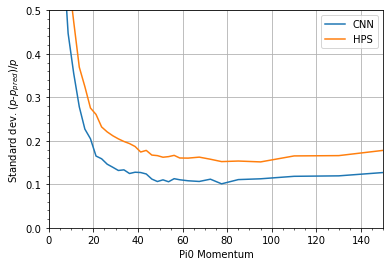

In [5]:
plotter.compare_profile(save_indv=False)

30 Bins, target count in each bin: 0.03333333333333333


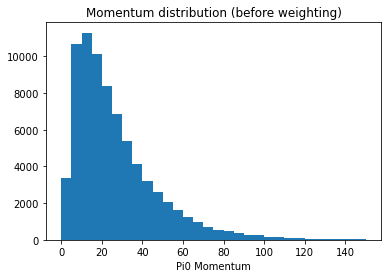

Average count 2508.5333333333333
Total up to 80 GeV:73161.0 Fraction:0.9721616881046029
Weights: [1.35282914 0.42862416 0.40479484 0.45116552 0.54597761 0.66752737
 0.8515014  1.10876879 1.42314426 1.74725353 2.24585584 2.80869932
 3.62901786 4.80816246 6.44931241 8.32889344 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]
[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150]
[19.285267 37.134697 18.68284  ... 18.956104 13.454525 37.589233]
[4 8 4 ... 4 3 8]
[0.45116552 1.10876879 0.45116552 ... 0.45116552 0.40479484 1.10876879]


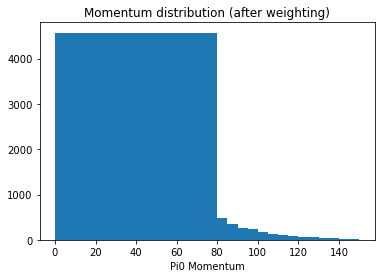

In [4]:
hist = plotter.gen_momentum(density=False)
print(f"Average count {np.mean(hist[0])}")
total = np.sum(hist[0])
up80 = np.sum(hist[0][:16])
print(f"Total up to 80 GeV:{up80} Fraction:{up80/total}")
# print(hist[1][16])
observed = hist[0]/total
# print(f"Fractions per bin: {observed}")
target = np.full(30, up80/(16*total))
target[16:] = observed[16:]
# print(target)

weights = target/observed
print(f"Weights: {weights}")

bins = hist[1]
index = np.digitize(plotter.df["pi0_p"], bins)
w = np.zeros(len(plotter.df["pi0_p"]))


for i in range(1,len(bins)):
    w[np.where(index==i)] = weights[i-1]
 

print(bins)
print(np.array(plotter.df["pi0_p"]))
print(index)
print(w)
plt.figure()
plt.hist(plotter.df["pi0_p"], bins=hist[1], weights=w)
plt.xlabel("Pi0 Momentum")
plt.title("Momentum distribution (after weighting)")
plt.show()

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150]


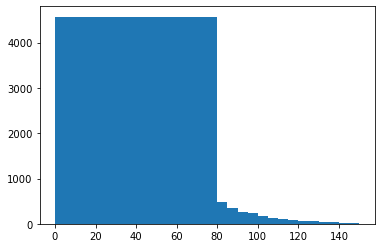

In [11]:
weights = np.array([1.35282914, 0.42862416, 0.40479484, 0.45116552, 0.54597761, 0.66752737, 0.8515014,
                                         1.10876879, 1.42314426, 1.74725353, 2.24585584, 2.80869932, 3.62901786, 4.80816246, 
                                         6.44931241, 8.32889344, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
bins =  np.arange(0, 155, 5)
# bins[-1] = 1000
print(bins)

index = np.digitize(plotter.df["pi0_p"], bins)
w = np.zeros(len(plotter.df["pi0_p"]))


for i in range(1,len(bins)):
    w[np.where(index==i)] = weights[i-1]
 
plt.figure()
plt.hist(plotter.df["pi0_p"], bins=bins, weights=w)
plt.show()

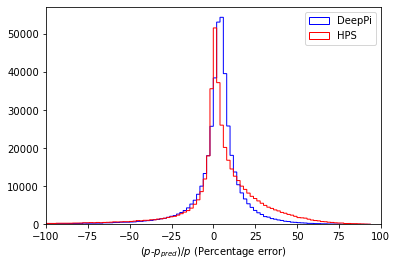

In [37]:
plotter.compare_momentum_pce()